# Suicide Rates Overview 1985 to 2014
문제: 
train set에는 1985년부터 2014년까지의 국가 별 자살 인구수 통계가
나와 있습니다. 

이 데이터를 가지고 다음 해 국가 별 자살 인구수를 예측하는 문제.

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/kernels


## 목차 

1. Collecting the data
2. Exploratory data analysis
3. Feature engineering
4. Modeling 
5. Testing

## 1. Collecting the data




In [2]:
import pandas as pd
import numpy as np


from google.colab import files
uploaded = files.upload()


train = pd.read_csv('train.csv')
test = pd.read_csv('test_mini.csv')

Saving test_mini.csv to test_mini.csv
Saving train.csv to train.csv


## 2. Exploratory data analysis

country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, gdp_for_year, gdp_per_capita, generation (based on age grouping average).


In [3]:
train.head(5)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
train.shape

(26916, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26916 entries, 0 to 26915
Data columns (total 12 columns):
country              26916 non-null object
year                 26916 non-null int64
sex                  26916 non-null object
age                  26916 non-null object
suicides_no          26916 non-null int64
population           26916 non-null int64
suicides_100k_pop    26916 non-null float64
country_year         26916 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         26916 non-null object
gdp_per_capital      26916 non-null int64
generation           26916 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
train.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
HDI_for_year         18552
gdp_for_year             0
gdp_per_capital          0
generation               0
dtype: int64

## 3. Feature engineering

In [0]:
# 필요없는 컬럼 삭제

features_drop = ['country_year', 'HDI_for_year', 'gdp_for_year']
test = test.drop(features_drop, axis=1)
train = train.drop(features_drop, axis=1)


In [8]:
train.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [9]:
test.head()

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capital,generation
0,Antigua and Barbuda,2015,female,55-74 years,6403,15.62,14853,Boomers
1,Antigua and Barbuda,2015,female,15-24 years,8561,0.00,14853,Millenials
2,Antigua and Barbuda,2015,female,25-34 years,7740,0.00,14853,Millenials
3,Antigua and Barbuda,2015,female,35-54 years,15323,0.00,14853,Generation X
4,Antigua and Barbuda,2015,female,5-14 years,8239,0.00,14853,Generation Z


In [0]:
train_test_data = [train, test]

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)
  
    

In [0]:
age_mapping = {"5-14 years":0,"15-24 years":1,"25-34 years":2,"35-54 years":3,"55-74 years":4,"75+ years":5}

for dataset in train_test_data:
    dataset['age'] = dataset['age'].map(age_mapping)


In [12]:
# country, generation labeling  & one -hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


train['generation'] = le.fit_transform(train['generation'])
test['generation'] = le.fit_transform(test['generation'])
train.head(10)


,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capital,generation
0,Albania,1987,0,1,21,312900,6.71,796,2
1,Albania,1987,0,3,16,308000,5.19,796,5
2,Albania,1987,1,1,14,289700,4.83,796,2
3,Albania,1987,0,5,1,21800,4.59,796,1
4,Albania,1987,0,2,9,274300,3.28,796,0
5,Albania,1987,1,5,1,35600,2.81,796,1
6,Albania,1987,1,3,6,278800,2.15,796,5
7,Albania,1987,1,2,4,257200,1.56,796,0
8,Albania,1987,0,4,1,137500,0.73,796,1
9,Albania,1987,1,0,0,311000,0.00,796,2


In [0]:


train['country'] = le.fit_transform(train['country'])
test['country'] = le.fit_transform(test['country'])



In [0]:

def normalize(X):
    return np.abs((X-np.mean(X))/np.std(X))
for dataset in train_test_data:
    dataset['gdp_per_capital']=normalize(dataset['gdp_per_capital'])
    dataset['population']=normalize(dataset['population'])


In [15]:
test.head(10)

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capital,generation
0,0,2015,1,4,0.499234,15.62,0.4737,0
1,0,2015,1,1,0.498781,0.00,0.4737,3
2,0,2015,1,2,0.498953,0.00,0.4737,3
3,0,2015,1,3,0.497362,0.00,0.4737,1
4,0,2015,1,0,0.498848,0.00,0.4737,2
5,0,2015,1,5,0.500216,0.00,0.4737,4
6,0,2015,0,1,0.498829,0.00,0.4737,3
7,0,2015,0,2,0.499096,0.00,0.4737,3
8,0,2015,0,3,0.497772,0.00,0.4737,1
9,0,2015,0,0,0.498842,0.00,0.4737,2


## Feature Selection

In [0]:
X = train.drop(['suicides_no'],axis=1)  #independent columns
y = train['suicides_no']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs          Score
5  suicides_100k_pop  276311.393418
0            country   46674.492960
4         population   22582.661530
7         generation    3725.876799
3                age    2685.384826
2                sex    1584.146986
6    gdp_per_capital     818.392358
1               year      66.925797


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


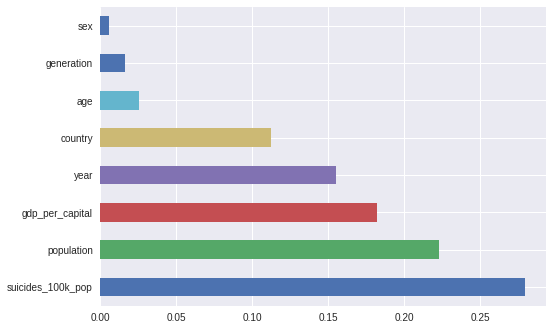

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## 4. Modeling 

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


import numpy as np



### Cross Validation ( K- fold)
  Cross Validation를 통한 validation 정확도 향상

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


target = train['suicides_no']

### 4.1 SVM 모델

### 4.2 XGBOOST 모델

In [27]:
# XGBOOST 모델 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)



from xgboost import XGBRegressor

clf = XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 4,
                        min_child_weight = 4,
                        gamma = 0,
                  )

score = cross_val_score(clf,X_train, y_train, cv=k_fold, n_jobs=-1)
print(score)

[0.98555889 0.99667505 0.9933273  0.9969749  0.99490533 0.99328848
 0.99521013 0.98712254 0.99634211 0.99498201]


In [28]:
print(round(np.mean(score)*100,2))

99.34


## 5. Test

In [30]:
clf = XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 4,
                        min_child_weight = 4,
                        gamma = 0,
                  )
clf.fit(X_train, y_train)

print("model score : {}".format(model.score(X_test, y_test)))


Accuracy for XGBOOST : 1.0


In [36]:
predict_suicide = model.predict(test)

test_result =pd.concat([test,pd.Series(model.predict(test)).to_frame('predict')],axis=1)
test_result

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capital,generation,predict
0,0,2015,1,4,0.499234,15.62,0.473700,0,4
1,0,2015,1,1,0.498781,0.00,0.473700,3,0
2,0,2015,1,2,0.498953,0.00,0.473700,3,0
3,0,2015,1,3,0.497362,0.00,0.473700,1,0
4,0,2015,1,0,0.498848,0.00,0.473700,2,0
5,0,2015,1,5,0.500216,0.00,0.473700,4,0
6,0,2015,0,1,0.498829,0.00,0.473700,3,0
7,0,2015,0,2,0.499096,0.00,0.473700,3,0
8,0,2015,0,3,0.497772,0.00,0.473700,1,0
9,0,2015,0,0,0.498842,0.00,0.473700,2,0


In [41]:

grouped= test_result['predict'].groupby(test_result['country']).sum()
grouped

country
0         4
1       180
2        18
3      1700
4       206
5      1253
6        11
7        15
8       211
9        51
10      159
11      617
12        6
13     1175
14      240
15      359
16      133
17      330
18       39
19      102
20      558
21        0
22      177
23      796
24      591
25      230
26      828
27     4545
28     1269
29      167
      ...  
32       37
33       20
34       25
35     1162
36      404
37       71
38      271
39       37
40     1311
41       21
42       88
43      313
44     1027
45    12356
46        3
47      359
48       19
49      256
50      325
51       33
52     1892
53      180
54      429
55       75
56      259
57       71
58      656
59     1878
60    19486
61      386
Name: predict, Length: 62, dtype: int64